<h1 align="center"><b>Contaminacion Sonora</b></h1>

Los niveles de sonido permitidos en la ciudad de Nueva York están regulados por la Agencia de Protección Ambiental de los Estados Unidos (EPA, por sus siglas en inglés) y la Ley de Control de Ruido de la Ciudad de Nueva York.

Según la EPA, la exposición prolongada a niveles de sonido superiores a 70 decibeles (dB) puede causar daño auditivo. En Nueva York, la Ley de Control de Ruido establece que el límite máximo de ruido permitido en áreas residenciales durante el día es de 45 dB y de 42 dB durante la noche. En áreas comerciales, el límite máximo de ruido durante el día es de 85 dB y de 80 dB durante la noche.

La ciudad de Nueva York también cuenta con un programa de monitoreo de ruido en toda la ciudad, que tiene como objetivo proteger la salud y el bienestar de los residentes de la ciudad, así como reducir la contaminación acústica. El programa de monitoreo de ruido utiliza equipos de medición de sonido para medir los niveles de ruido en áreas específicas de la ciudad y se lleva a cabo en colaboración con varias agencias de la ciudad, incluida la Junta de Normas de Ruido de la Ciudad de Nueva York.

En conclusión, los niveles de sonido permitidos por el oído humano en Nueva York están regulados por la EPA y la Ley de Control de Ruido de la Ciudad de Nueva York. Los límites máximos de ruido permitidos varían según la zona y el horario del día. Además, la ciudad cuenta con un programa de monitoreo de ruido en toda la ciudad para proteger la salud y el bienestar de los residentes.

In [2]:
%load_ext autoreload
%autoreload 2
# Gestion de rutas
import utils.paths as path
# Importacion de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import re
# Directorio de los datos crudos / raw data
raw_data_dir = path.make_dir_function(['datasets', 'raw'])
proc_data_dir = path.make_dir_function(['datasets', 'processed'])

# Dataset 1: Registro de presencia de tipos de sonidos en NYC

In [2]:
# Funcion para descargar el dataset
def download_file(url, file_name):
    # Ruta para guardar el archivo
    file_path = raw_data_dir(raw_data_dir(), file_name)
    
    # Verifica si el archivo ya existe en la ruta especificada
    # if os.path.exists(file_path):
    #     print(f"{file_name} ya existe en la ruta especificada.")
        # return
    
    try:
        # Solicitud GET para descargar el archivo
        response = requests.get(url)
        if response.status_code == 200:
            with open(file_path, "wb") as f:
                f.write(response.content)
            print(f"{file_name} ha sido descargado y guardado en {raw_data_dir()}")
        else:
            print(f"No se pudo descargar {file_name}. El código de estado d la solicitud es {response.status_code}.")
    except requests.exceptions.RequestException as e:
        print(f"No se pudo descargar {file_name}. Se produjo un error de red: {e}")

# URL del dataset
url = "https://zenodo.org/record/3966543/files/annotations.csv?download=1"
# Descargar el dataset
download_file(url, 'noise_pollution.csv')

noise_pollution.csv ha sido descargado y guardado en d:\Backup\GitHub\Proyecto_grupal_DS\datasets\raw


In [61]:
# Lectura del dataset
noise_pollution = pd.read_csv(raw_data_dir('noise_pollution.csv'))
noise_pollution.head(2)

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1


Las variables que corresponden a los sonidos emitidos por los vehículos de transporte en NYC son:

1. ``1-1_small-sounding-engine_presence``: Indica si un vehículo tiene un motor de sonido pequeño o no.
2. ``1-2_medium-sounding-engine_presence``: Indica si un vehículo tiene un motor de sonido medio o no.
3. ``1-3_large-sounding-engine_presence``: Indica si un vehículo tiene un motor de sonido grande o no.
4. ``1-X_engine-of-uncertain-size_presence``: Indica si hay un motor en el vehículo cuyo tamaño de sonido no se puede determinar con certeza.
5. ``5-1_car-horn_presence``: Indica si un vehículo tiene una bocina o claxon.
6. ``5-2_car-alarm_presence``: Indica si un vehículo tiene una alarma antirrobo.
7. ``5-3_siren_presence:`` Indica si un vehículo tiene una sirena, que generalmente se asocia con vehículos de emergencia como ambulancias y patrullas.
8. ``5-4_reverse-beeper_presence``: Indica si un vehículo tiene un dispositivo de señalización de marcha atrás, que suena cuando el vehículo se mueve hacia atrás.
9. ``5-X_other-unknown-alert-signal_presence``: Indica si hay algún otro tipo de señal de alerta en el vehículo cuyo tipo no se puede determinar con certeza.

<h3 align="center">Descripcion de las variables</h3>

----

***<coarse_id>-<fine_id>_<fine_name>_presence***

Las columnas de esta forma indican la presencia de clase de nivel fino. 1si está presente, 0si no está presente. Si -1, entonces la clase no se etiquetó en esta anotación porque la anotación la realizó un miembro del equipo de SONYC que solo anotó un grupo aproximado de clases a la vez cuando anotaba el subconjunto verificado.

***<coarse_id>_<coarse_name>_presence***

Las columnas de esta forma indican la presencia de una clase de nivel bajo. 1si está presente, 0si no está presente. Si -1, entonces la clase no se etiquetó en esta anotación porque la anotación la realizó un miembro del equipo de SONYC que solo anotó un grupo aproximado de clases a la vez cuando anotaba el subconjunto verificado. Estas columnas se calculan a partir de las columnas de presencia de clase de nivel fino y se presentan aquí para mayor comodidad cuando se entrena solo en clases de nivel bajo.

***<coarse_id>-<fine_id>_<fine_name>_proximity***

Las columnas de esta forma indican la proximidad de una clase de nivel fino. Después de indicar la presencia de una clase de nivel fino, se pidió a los anotadores de ciencia ciudadana que indicaran la proximidad del evento sonoro al sensor. Solo los voluntarios de ciencia ciudadana realizaron esta tarea, por lo que estos datos no se incluyen en las anotaciones verificadas. Esta columna puede tomar uno de los cuatro valores siguientes: ( near, far, notsure, -1). Si -1, la proximidad no se anotó porque la anotación no la realizó un voluntario de ciencia ciudadana o el voluntario de ciencia

In [4]:
# Variables seleccionados
selected_cols = [
    # 'audio_filename',
    # 'annotator_id',
    'borough',
    'block', 
    'latitude',
    'longitude',
    'year',
    'week',
    'day',
    'hour',
    '1-1_small-sounding-engine_presence',
    '1-2_medium-sounding-engine_presence',
    '1-3_large-sounding-engine_presence',
    '1-X_engine-of-uncertain-size_presence',
    '5-1_car-horn_presence',
    '5-2_car-alarm_presence',
    '5-3_siren_presence',
    '5-4_reverse-beeper_presence',
    '5-X_other-unknown-alert-signal_presence'
]
# Filtración de las avriables seleccionadas
noise_pollution = noise_pollution[selected_cols]

In [5]:
# Funcion para crear una columna de fecha
def make_date_col(df: pd.DataFrame, col_name: str):
    df[col_name] = pd.to_datetime(df['year'].astype(str) + df['week'].astype(str) + df['day'].astype(str), format='%Y%W%w')
    df[col_name] = pd.to_datetime(df['date'].dt.strftime('%Y-%m-%d') + ' ' + df['hour'].astype(str) + ':00:00')
    df = df.drop(columns=['year','week', 'day', 'hour'], axis=1)
    return df

In [6]:
# Creación de la columna date
noise_pollution = make_date_col(noise_pollution, 'date')

In [7]:
# Funcion que reemplaza: 1: 'Manhattan', 3: 'Brooklyn' y 4: 'Queens'
def replace_borough(df: pd.DataFrame, colname: str):
    borough = {
        1: 'Manhattan',
        3: 'Brooklyn',
        4: 'Queens',
    }
    df[colname] = df[colname].replace(borough)
    return df

In [8]:
# Reemplazo de las categorias en borough
noise_pollution = replace_borough(noise_pollution, 'borough')

In [9]:
engine_cols = [
    '1-1_small-sounding-engine_presence', 
    '1-2_medium-sounding-engine_presence',
    '1-3_large-sounding-engine_presence',
    '1-X_engine-of-uncertain-size_presence'
]

for col in engine_cols:
    print(f'Conteo de valores en {col}:\n{noise_pollution[col].value_counts()}\n')

Conteo de valores en 1-1_small-sounding-engine_presence:
 0    56323
-1     3636
 1     2063
Name: 1-1_small-sounding-engine_presence, dtype: int64

Conteo de valores en 1-2_medium-sounding-engine_presence:
 0    51639
 1     6747
-1     3636
Name: 1-2_medium-sounding-engine_presence, dtype: int64

Conteo de valores en 1-3_large-sounding-engine_presence:
 0    50716
 1     7670
-1     3636
Name: 1-3_large-sounding-engine_presence, dtype: int64

Conteo de valores en 1-X_engine-of-uncertain-size_presence:
 0    55784
-1     3636
 1     2602
Name: 1-X_engine-of-uncertain-size_presence, dtype: int64



In [10]:
noise_pollution.head(2)

,borough,block,latitude,longitude,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,5-3_siren_presence,5-4_reverse-beeper_presence,5-X_other-unknown-alert-signal_presence,date
0,Manhattan,547,40.72951,-73.99388,-1,-1,-1,-1,-1,-1,-1,-1,-1,2019-10-31 08:00:00
1,Manhattan,547,40.72951,-73.99388,0,0,1,0,-1,-1,-1,-1,-1,2019-10-31 08:00:00


In [11]:
noise_pollution.reset_index(drop=True, inplace=True)
noise_pollution.to_parquet(proc_data_dir('noise_pollution.parquet'))

### Usando la data transformada 

In [49]:
# noise_pollution_raw = pd.read_csv(raw_data_dir('noise_pollution.csv'))
# noise_pollution_raw.head()
# noise_pollution_raw.groupby(['year','day','hour']).count().reset_index()['hour'].unique()


In [62]:
# Lectura del dataset
noise_pollution = pd.read_parquet(proc_data_dir('noise_pollution.parquet'))

Descripcion de la variables de los tipos de sonidos:

* Eliminamos los valores cero de cada columna que representa la fuente sonido en nuestro dataset.

<!--  -->

In [75]:
def delete_negative_val_rows(df):
    # definir función lambda que evalúa si el valor de al menos una de las n columnas es igual a -1
    condition = lambda row: any([val==-1 for val in row.values])
    # eliminar filas que cumplen con la condición
    df = df[~df.apply(condition, axis=1)]
    df.reset_index(drop=True, inplace=True)
    return df

In [76]:
# Creamos nuevo dataframe con la transformacion aplciada
noise_pollution_v1 = delete_negative_val_rows(noise_pollution)

In [77]:
noise_pollution_v1['date'].dt.day

0        31
1        31
2        31
3        31
4        20
         ..
56905    19
56906    19
56907    21
56908    21
56909    21
Name: date, Length: 56910, dtype: int64

In [80]:
a = noise_pollution_v1[noise_pollution_v1['date'] == '2016-05-06 12:00:00']
a

,borough,block,latitude,longitude,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,5-3_siren_presence,5-4_reverse-beeper_presence,5-X_other-unknown-alert-signal_presence,date
54316,Manhattan,547,40.72951,-73.99425,0,0,0,0,0,0,0,0,0,2016-05-06 12:00:00
54317,Manhattan,547,40.72951,-73.99425,0,0,0,1,0,0,0,0,0,2016-05-06 12:00:00
54318,Manhattan,547,40.72951,-73.99425,0,0,0,0,0,0,0,0,0,2016-05-06 12:00:00


In [88]:
noise_pollution_v1.groupby('date').count().iloc[:,1].unique()

array([ 3,  4,  6,  9,  7, 18, 12, 10, 13, 16, 15,  8, 19, 21, 24, 11, 30,
       22, 25, 27, 28, 33, 36, 35, 29, 37, 43, 14], dtype=int64)

In [115]:
(noise_pollution_v1.groupby(['borough',noise_pollution_v1['date'].dt.hour]).sum().iloc[:,3:]/24)*100#.reset_index()#['date'].unique()

1-1_small-sounding-engine_presence  \
borough  date                                       
Brooklyn 0                               4.166667   
         1                               4.166667   
         2                               8.333333   
         3                               4.166667   
         4                              12.500000   
...                                           ...   
Queens   16                             12.500000   
         18                              0.000000   
         19                              4.166667   
         20                              4.166667   
         22                              4.166667   

               1-2_medium-sounding-engine_presence  \
borough  date                                        
Brooklyn 0                               20.833333   
         1                               20.833333   
         2                               20.833333   
         3                               16.666667   
         4                               25.000000   
...                                            ...   
Queens   16                              16.666667   
         18                               8.333333   
         19                               8.333333   
         20                              12.500000   
         22                               4.166667   

               1-3_large-sounding-engine_presence  \
borough  date                                       
Brooklyn 0                              20.833333   
         1                              12.500000   
         2                              33.333333   
         3                               8.333333   
         4                              29.166667   
...                                           ...   
Queens   16                             12.500000   
         18                              8.333333   
         19                             20.833333   
         20                             16.666667   
         22                              0.000000   

               1-X_engine-of-uncertain-size_presence  5-1_car-horn_presence  \
borough  date                                                                 
Brooklyn 0                                  8.333333               0.000000   
         1                                 16.666667              12.500000   
         2                                 25.000000              12.500000   
         3                                  4.166667               8.333333   
         4                                  8.333333              16.666667   
...                                              ...                    ...   
Queens   16                                 0.000000              25.000000   
         18                                 4.166667               0.000000   
         19                                 8.333333              29.166667   
         20                                 4.166667              33.333333   
         22                                 0.000000               0.000000   

               5-2_car-alarm_presence  5-3_siren_presence  \
borough  date                                               
Brooklyn 0                   0.000000            4.166667   
         1                   0.000000            4.166667   
         2                   0.000000           16.666667   
         3                   0.000000            0.000000   
         4                   4.166667            0.000000   
...                               ...                 ...   
Queens   16                  0.000000            0.000000   
         18                  0.000000            0.000000   
         19                  4.166667            0.000000   
         20                  0.000000            0.000000   
         22                  0.000000            0.000000   

               5-4_reverse-beeper_presence  \
borough  date                                
Brooklyn 0        

In [ ]:
# Convertir la columna a un objeto de fecha y hora
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'])

# Agrupar por día y contar el número de filas por día
por_dia = df.groupby(df['fecha_hora'].dt.day)['fecha_hora'].count()

In [66]:
# Cuantificacion fraccional de la presencia de los diferentes tipos de sonido/ruido por día
# 1 día = 24 => 100%

noise_pollution_v1.groupby().count()

KeyError: 'day'

In [53]:
import gc
gc.collect()

47

In [5]:
noise_pollution.date.min(), noise_pollution.date.max()

(Timestamp('2016-05-06 12:00:00'), Timestamp('2020-01-05 15:00:00'))

In [6]:
noise_pollution.head(2)

,borough,block,latitude,longitude,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,5-3_siren_presence,5-4_reverse-beeper_presence,5-X_other-unknown-alert-signal_presence,date
0,Manhattan,547,40.72951,-73.99388,-1,-1,-1,-1,-1,-1,-1,-1,-1,2019-10-31 08:00:00
1,Manhattan,547,40.72951,-73.99388,0,0,1,0,-1,-1,-1,-1,-1,2019-10-31 08:00:00


In [7]:
cols_noise_pollu = {
    '1-1_small-sounding-engine_presence': 'small-sounding-engine_presence',
    '1-2_medium-sounding-engine_presence': 'medium-sounding-engine_presence',
    '1-3_large-sounding-engine_presence': 'large-sounding-engine_presence',
    '1-X_engine-of-uncertain-size_presence': 'uncertain-size_presence',
    '5-1_car-horn_presence': 'car-horn_presence',
    '5-2_car-alarm_presence': 'car-alarm_presence',
    '5-3_siren_presence': 'siren_presence',
    '5-4_reverse-beeper_presence': 'reverse-beeper_presence',
    '5-X_other-unknown-alert-signal_presence': 'unknown-alert-signal_presence',
}

In [8]:
noise_pollution.groupby(['borough', '1-1_small-sounding-engine_presence']).count()

block  latitude  longitude  \
borough   1-1_small-sounding-engine_presence                               
Brooklyn  -1                                    518       518        518   
           0                                   2771      2771       2771   
           1                                     67        67         67   
Manhattan -1                                   3094      3094       3094   
           0                                  53448     53448      53448   
           1                                   1985      1985       1985   
Queens    -1                                     24        24         24   
           0                                    104       104        104   
           1                                     11        11         11   

                                              1-2_medium-sounding-engine_presence  \
borough   1-1_small-sounding-engine_presence                                        
Brooklyn  -1                                                                  518   
           0                                                                 2771   
           1                                                                   67   
Manhattan -1                                                                 3094   
           0                                                                53448   
           1                                                                 1985   
Queens    -1                                                                   24   
           0                                                                  104   
           1                                                                   11   

                                              1-3_large-sounding-engine_presence  \
borough   1-1_small-sounding-engine_presence                                       
Brooklyn  -1                                                                 518   
           0                                                                2771   
           1                                                                  67   
Manhattan -1                                                                3094   
           0                                                               53448   
           1                                                                1985   
Queens    -1                                                                  24   
           0                                                                 104   
           1                                                                  11   

                                              1-X_engine-of-uncertain-size_presence  \
borough   1-1_small-sounding-engine_presence                                          
Brooklyn  -1                                                                    518   
           0                                                                   2771   
           1                                                                     67   
Manhattan -1                                                                   3094   
           0                                                                  53448   
           1                                                                   1985   
Queens    -1                                                                     24   
           0                                                                    104   
           1                                                                     11   

                                              5-1_car-horn_presence  \
borough   1-1_small-sounding-engine_presence                          
Brooklyn  -1                                                    518   
           0                                                   2771   
           1                                                     67   
Manhattan -1                       

In [29]:
cols_selected = ['1-1_small-sounding-engine_presence',
       '1-2_medium-sounding-engine_presence',
    #    '1-3_large-sounding-engine_presence',
    #    '1-X_engine-of-uncertain-size_presence', 
    #    '5-1_car-horn_presence',
    #    '5-2_car-alarm_presence', 
    #    '5-3_siren_presence',
    #    '5-4_reverse-beeper_presence',
    #    '5-X_other-unknown-alert-signal_presence'
    ]
for col in noise_pollution[cols_selected].columns:
    print(noise_pollution.groupby(['borough', col]).count().rename({'block':'count'}, axis=1).reset_index().iloc[:,:3])

     borough  1-1_small-sounding-engine_presence  count
0   Brooklyn                                  -1    518
1   Brooklyn                                   0   2771
2   Brooklyn                                   1     67
3  Manhattan                                  -1   3094
4  Manhattan                                   0  53448
5  Manhattan                                   1   1985
6     Queens                                  -1     24
7     Queens                                   0    104
8     Queens                                   1     11
     borough  1-2_medium-sounding-engine_presence  count
0   Brooklyn                                   -1    518
1   Brooklyn                                    0   2549
2   Brooklyn                                    1    289
3  Manhattan                                   -1   3094
4  Manhattan                                    0  49005
5  Manhattan                                    1   6428
6     Queens                             

In [3]:

def plot_sound_presence_distribution(data):
    # Crear la tabla pivote
    cols_selected = ['1-1_small-sounding-engine_presence',
       '1-2_medium-sounding-engine_presence',
       '1-3_large-sounding-engine_presence',
       '1-X_engine-of-uncertain-size_presence',
       '5-1_car-horn_presence',
       '5-2_car-alarm_presence',
       '5-3_siren_presence',
       '5-4_reverse-beeper_presence',
       '5-X_other-unknown-alert-signal_presence']
    for col in data[cols_selected].columns:
        df = data.groupby(['borough', col]).count().rename({'block':'count'}, axis=1).reset_index().iloc[:,:3]
        
        
        # Crear el gráfico
        sns.set(style="ticks")
        sns.set_palette("Dark2")

        # grafico = sns.catplot(x="borough", y="count", hue=col, data=df, kind="bar", height=4.5, aspect=1.8, legend_out=False, orient='h')
        grafico = sns.catplot(x="count", y="borough", hue=col, data=df, kind="bar", height=4.5, aspect=1.8, legend_out=False, orient='h')

        # Aplicar transformación logarítmica al eje x
        grafico.set(xscale="log")
        grafico.set(xticks=[1, 10, 100, 1000, 10000, 100000, 1000000]) # Establecer los ticks del eje x
        
        grafico.set_xlabels("Log(count)", fontweight='bold')
        grafico.set_ylabels("Borough", fontweight='bold')
        plt.legend(title=f"{re.sub(r'[^a-zA-Z]+', ' ', col).strip().title()}", loc="lower right", ncol=3)

        grafico.despine(left=True)
        # Ajustar el título
        plt.subplots_adjust(top=0.89)
        grafico.fig.suptitle(f"Distribution of {re.sub(r'[^a-zA-Z]+', ' ', col).strip().title()} by Borough", fontsize=16, fontweight='bold')
    plt.show()


### Gráfico de distribucion de tipos de grupos de sonido por Borough

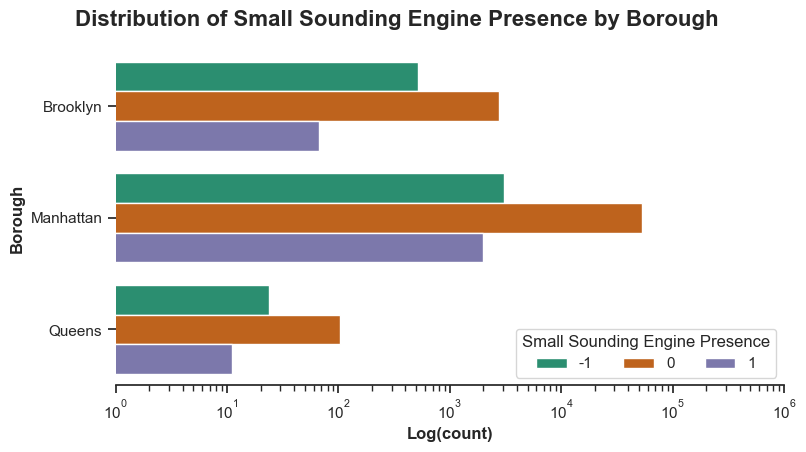

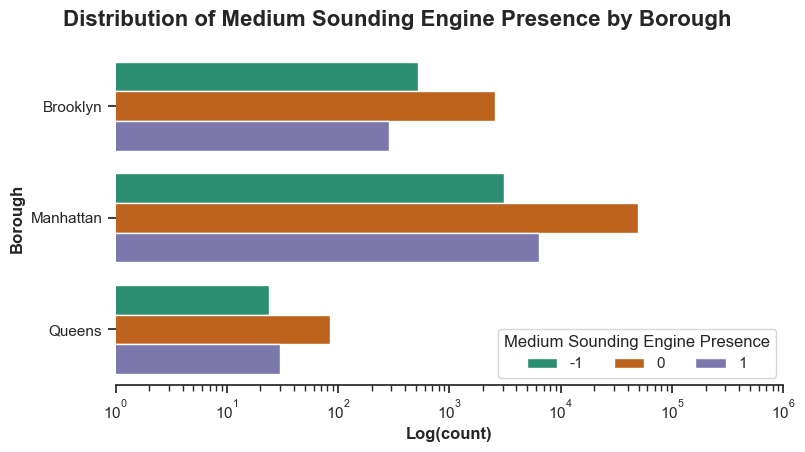

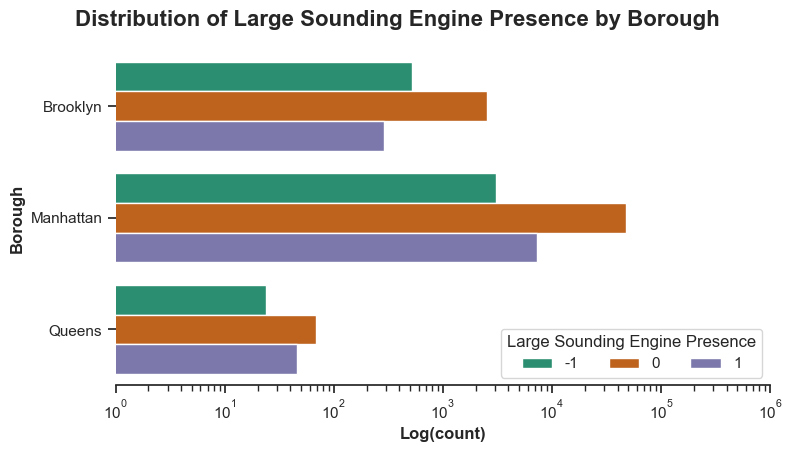

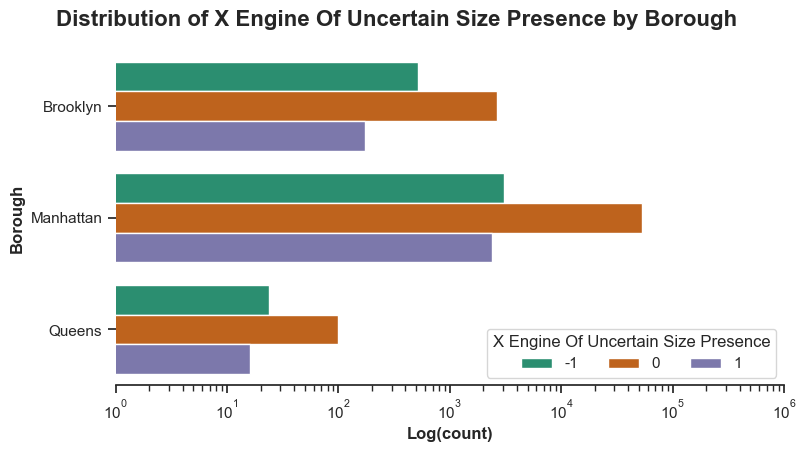

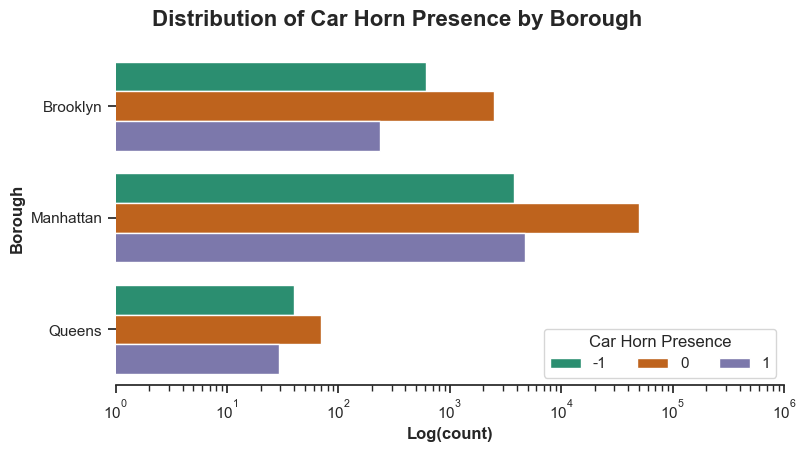

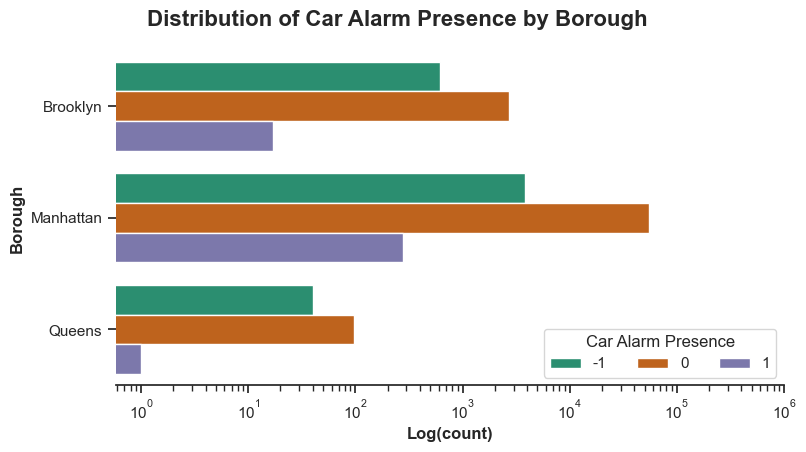

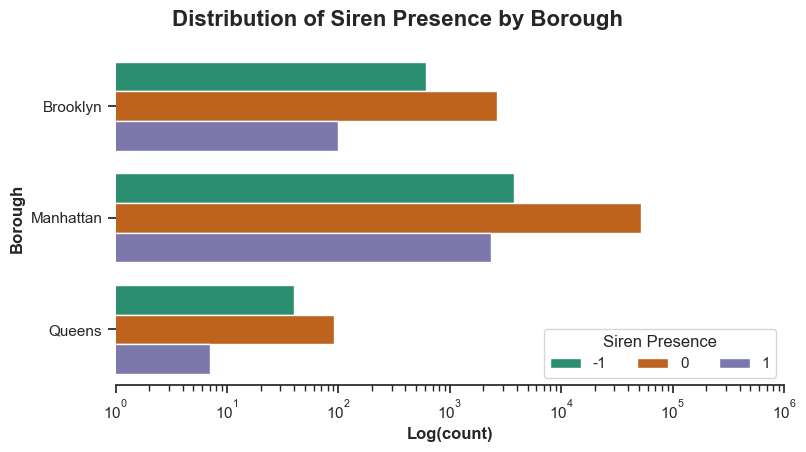

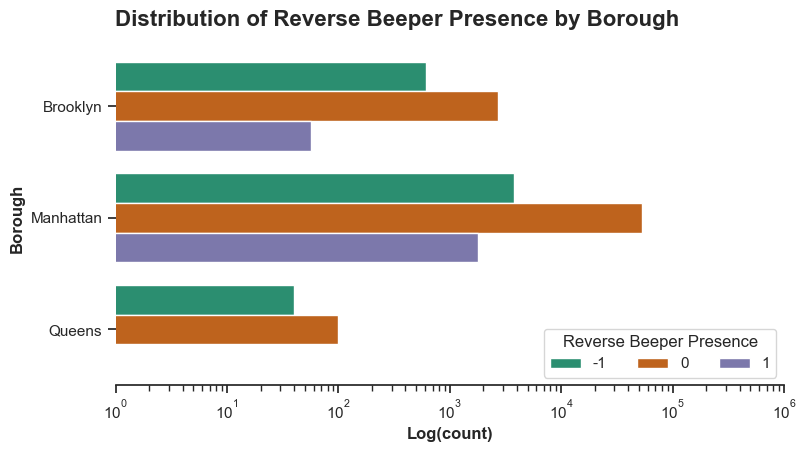

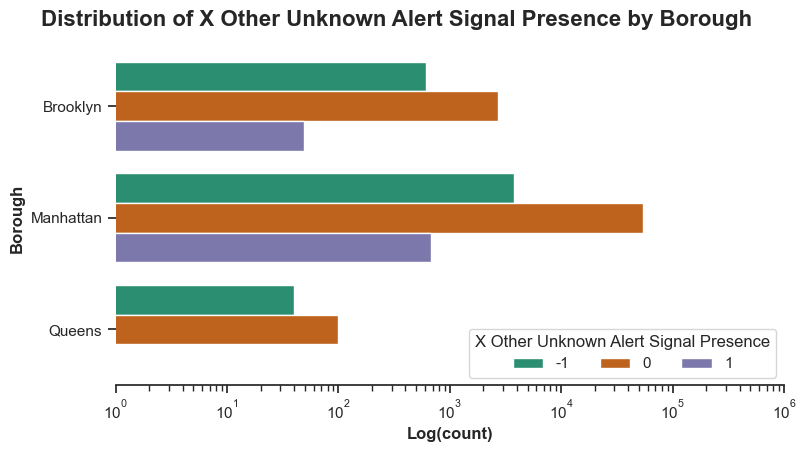

In [9]:
plot_sound_presence_distribution(noise_pollution)

In [12]:
# 
noise_pollution.groupby(['borough', '1-1_small-sounding-engine_presence']).count().rename({'block':'count'}, axis=1).iloc[:,:1]

count
borough   1-1_small-sounding-engine_presence       
Brooklyn  -1                                    518
           0                                   2771
           1                                     67
Manhattan -1                                   3094
           0                                  53448
           1                                   1985
Queens    -1                                     24
           0                                    104
           1                                     11

In [46]:
# Reordenar columnas
noise_pollution = noise_pollution.iloc[:,[0,1,2,3,-1,4,5,6,7,8,9,10,11,12]]

### Gráfica de las registro de sonidos/audios por Borough

In [45]:
import folium
from folium.plugins import MiniMap

In [164]:
count_by_borough = noise_pollution.groupby(['borough','1-1_small-sounding-engine_presence']).count().reset_index().iloc[:,:3].rename({'block':'count'}, axis=1)
lat_lng = noise_pollution.groupby(['borough', '1-1_small-sounding-engine_presence'])[['latitude', 'longitude']].mean().reset_index().drop('1-1_small-sounding-engine_presence', axis=1)

In [167]:
count_by_borough

,borough,1-1_small-sounding-engine_presence,count
0,Brooklyn,-1,518
1,Brooklyn,0,2771
2,Brooklyn,1,67
3,Manhattan,-1,3094
4,Manhattan,0,53448
5,Manhattan,1,1985
6,Queens,-1,24
7,Queens,0,104
8,Queens,1,11


In [182]:
# 
subset_of_df = pd.concat([count_by_borough,lat_lng], axis=1).reset_index(drop=True)

In [224]:
subset_of_df

,borough,1-1_small-sounding-engine_presence,count,borough,latitude,longitude
0,Brooklyn,-1,518,Brooklyn,40.690811,-73.988817
1,Brooklyn,0,2771,Brooklyn,40.693121,-73.987568
2,Brooklyn,1,67,Brooklyn,40.692893,-73.987970
3,Manhattan,-1,3094,Manhattan,40.731297,-73.994255
4,Manhattan,0,53448,Manhattan,40.732502,-73.993660
5,Manhattan,1,1985,Manhattan,40.732677,-73.993381
6,Queens,-1,24,Queens,40.738020,-73.851840
7,Queens,0,104,Queens,40.738020,-73.851840
8,Queens,1,11,Queens,40.738020,-73.851840


In [214]:
noise_poll_map = folium.Map(location=[subset_of_df['latitude'].mean(),subset_of_df['longitude'].mean()], zoom_start=12)
# noise_poll_map

In [8]:
noise_poll_map_1 = folium.Map(location=[noise_pollution['latitude'].mean(),noise_pollution['longitude'].mean()], zoom_start=12)

In [10]:
for index, row in noise_pollution.sample(500).iterrows():
    # noise_poll_map.add_child(folium.Marker(location=[row['latitude'], row['longitude']], popup=f'1-1_small-sounding-engine_presence: {row["1-1_small-sounding-engine_presence"]} Count: {row["count"]}'))
    noise_poll_map_1.add_child(folium.Marker(location=[row['latitude'], row['longitude']], popup=f'1-1_small-sounding-engine_presence: {row["1-1_small-sounding-engine_presence"]}'))


### Gráfico en una mapa

In [13]:
import folium
from folium.plugins import MarkerCluster

In [14]:
# Crear mapa centrado en Nueva York
mapa = folium.Map(location=[noise_pollution['latitude'].mean(), noise_pollution['longitude'].mean()], zoom_start=14)

# Crear cluster para agrupar los marcadores
cluster = MarkerCluster().add_to(mapa)

# Iterar sobre los registros y crear marcadores en el mapa
for index, row in noise_pollution.iterrows():
    popup = folium.Popup(f"<b>{row['borough']}</b>: {row['1-1_small-sounding-engine_presence']}")
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup).add_to(cluster)

In [ ]:
# Mostrar mapa
# mapa